# Problem Statement:

Ensuring access to safe drinking water is a critical public health concern worldwide. Water contamination from natural or anthropogenic sources poses severe risks to health, agriculture, and industry. Traditional methods of water quality testing are often time-consuming, expensive, and limited by geographic accessibility.

This project aims to develop a machine learning-based classification model to predict whether a water sample is safe for consumption based on its chemical properties. Using a dataset that includes various water quality indicators such as pH, dissolved oxygen, electrical conductivity, and concentrations of harmful substances (e.g., arsenic, lead, and nitrates), learners will create a robust model to classify water samples as safe or unsafe.

# Step-by-Step Guide to Start an ML Project

1. Define the Problem Clearly
2. Collect the Data
3. Preprocess the Data
4. Explore and Understand the Data (EDA)
5. Select a Model
6. Train the Model
7. Evaluate the Model
8. Test on Unseen Data
9. Deploy or Share Your Project




In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read the CSV file
df_data = pd.read_csv("C:\\Users\\thang\\Desktop\\project_data.csv")

In [5]:
df_data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,NaN,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [6]:
df_data.tail

<bound method NDFrame.tail of       aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mer

In [7]:
# Check the shape of the DataFrame
df_data.shape

(7999, 21)

In [8]:
# Check the first few rows of the DataFrame
df_data.isnull().sum()

aluminium        0
ammonia          0
arsenic          0
barium           0
cadmium        248
chloramine       0
chromium         0
copper           0
flouride        64
bacteria         0
viruses          0
lead             0
nitrates         0
nitrites         0
mercury          0
perchlorate    267
radium           0
selenium         0
silver           0
uranium          0
is_safe          0
dtype: int64

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7751 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7935 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7732 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [10]:
#
df_data.describe()


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7751.000000,7999.000000,7999.000000,7999.000000,7935.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7732.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.044029,2.176831,0.247226,0.805857,0.771943,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,15.972860,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.035954,2.567027,0.270640,0.653539,0.435307,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.527693,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.009000,0.100000,0.050000,0.090000,0.410000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.070000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.315000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,28.450000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [11]:
df_data['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

In [12]:
# change the data types object into numeric
for col in df_data.select_dtypes(include='object').columns:
    df_data[col] = pd.to_numeric(df_data[col], errors='coerce')


In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7751 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7935 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7732 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

#  Explore and Understand the Data (EDA)

1.Univariate analysis

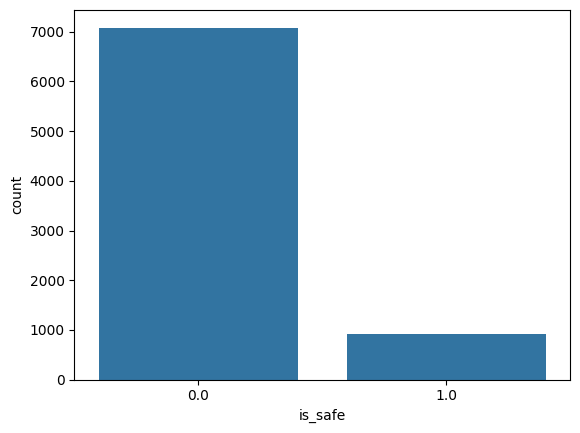

In [14]:


sns.countplot(x='is_safe', data=df_data)
plt.show()


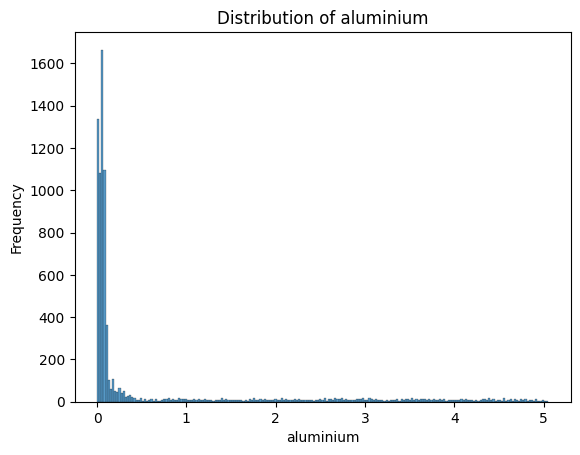

In [15]:


# Create the histogram
sns.histplot(data=df_data, x='aluminium')

# Add title and axis labels
plt.title('Distribution of aluminium')
plt.xlabel('aluminium')
plt.ylabel('Frequency')

# Show the plot
plt.show()



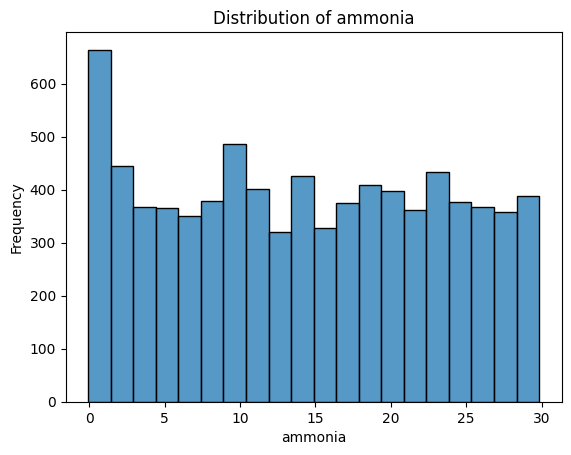

In [16]:


# Create the histogram with KDE
sns.histplot(data=df_data, x='ammonia')

# Add title and axis labels
plt.title('Distribution of ammonia')
plt.xlabel('ammonia')
plt.ylabel('Frequency')

# Show the plot
plt.show()


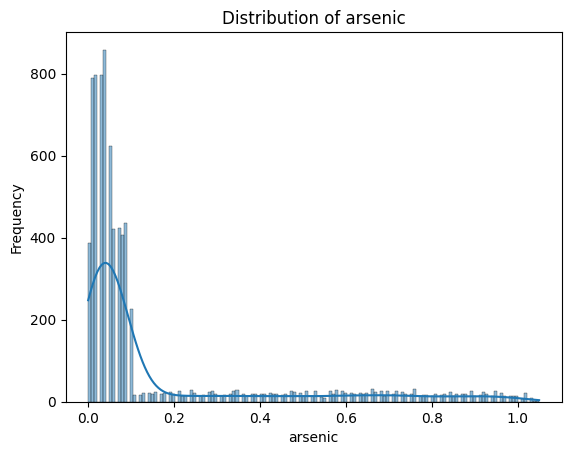

In [17]:


# Create the histogram with KDE
sns.histplot(data=df_data, x='arsenic', kde=True)

# Add title and axis labels
plt.title('Distribution of arsenic')
plt.xlabel('arsenic')
plt.ylabel('Frequency')

# Show the plot
plt.show()


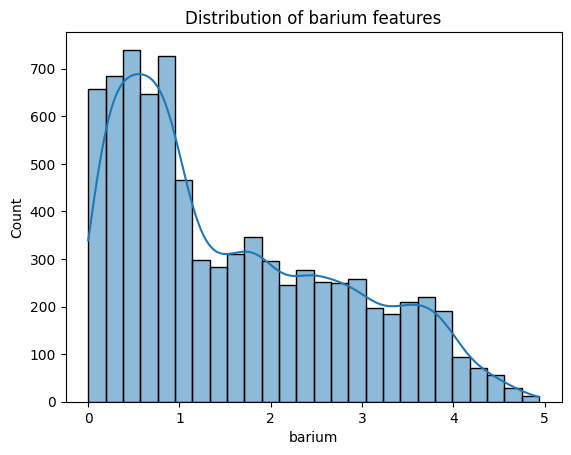

In [18]:


# Create the histogram with KDE
sns.histplot(data=df_data, x='barium', kde=True)

# Add title and axis labels
plt.title('Distribution of barium features')
plt.xlabel('barium')
plt.ylabel('Count')

# Show the plot
plt.show()


In [19]:
#df_data.columns

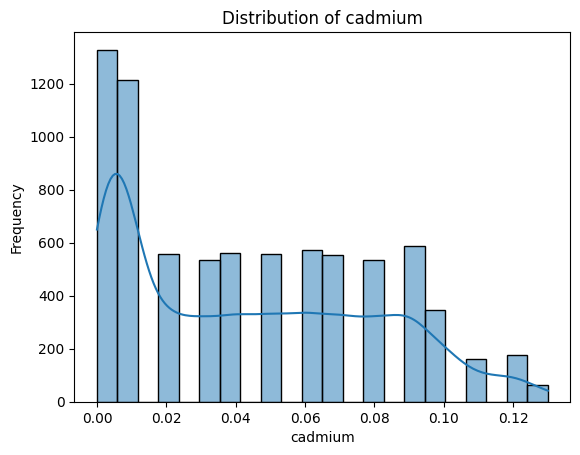

In [20]:
sns.histplot(data=df_data, x='cadmium', kde=True)

# Add title and axis labels
plt.title('Distribution of cadmium')
plt.xlabel('cadmium')
plt.ylabel('Frequency')

# Show the plot
plt.show()

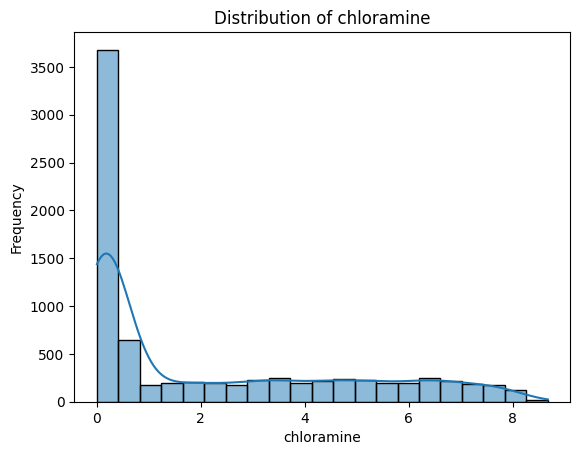

In [21]:
sns.histplot(data=df_data, x='chloramine', kde=True)

# Add title and axis labels
plt.title('Distribution of chloramine')
plt.xlabel('chloramine')
plt.ylabel('Frequency')

# Show the plot
plt.show()

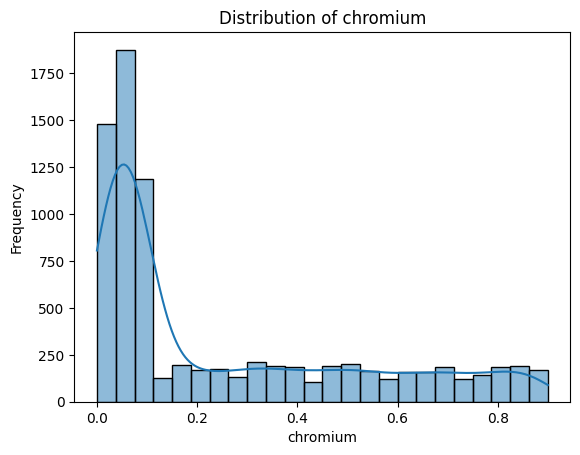

In [22]:
sns.histplot(data=df_data, x='chromium', kde=True)

# Add title and axis labels
plt.title('Distribution of chromium')
plt.xlabel('chromium')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Pie Chart
df_data['is_safe'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Safe', 'Unsafe'],
    colors=['lightgreen', 'red'],
    startangle=90,
    shadow=True
)

plt.title('Safe vs Unsafe Water')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7751 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7935 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7732 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

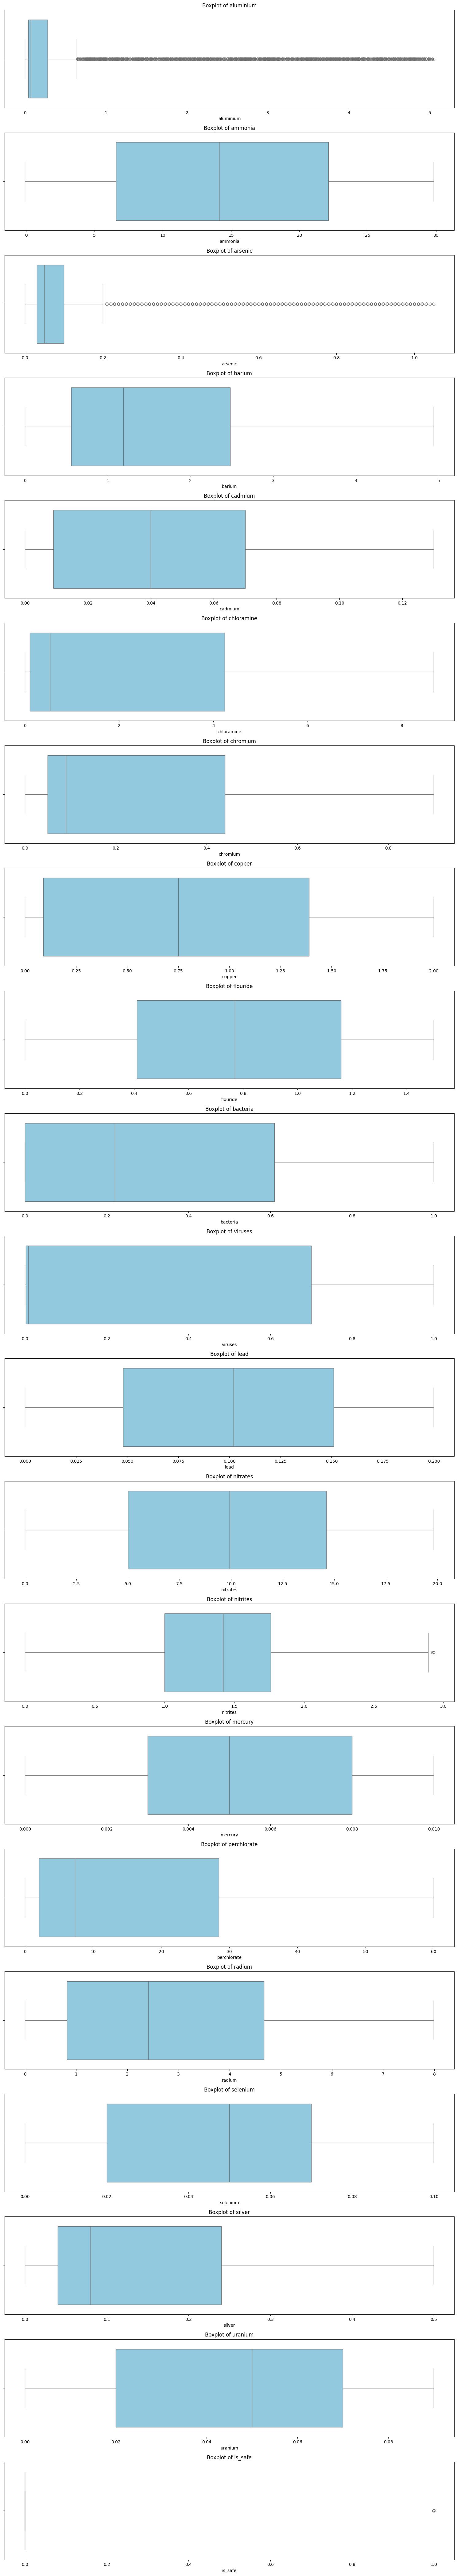

In [24]:
#  Boxplot for Feature Distribution
# Select only numerical columns
numerical_cols = df_data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each feature
plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
numerical_cols

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

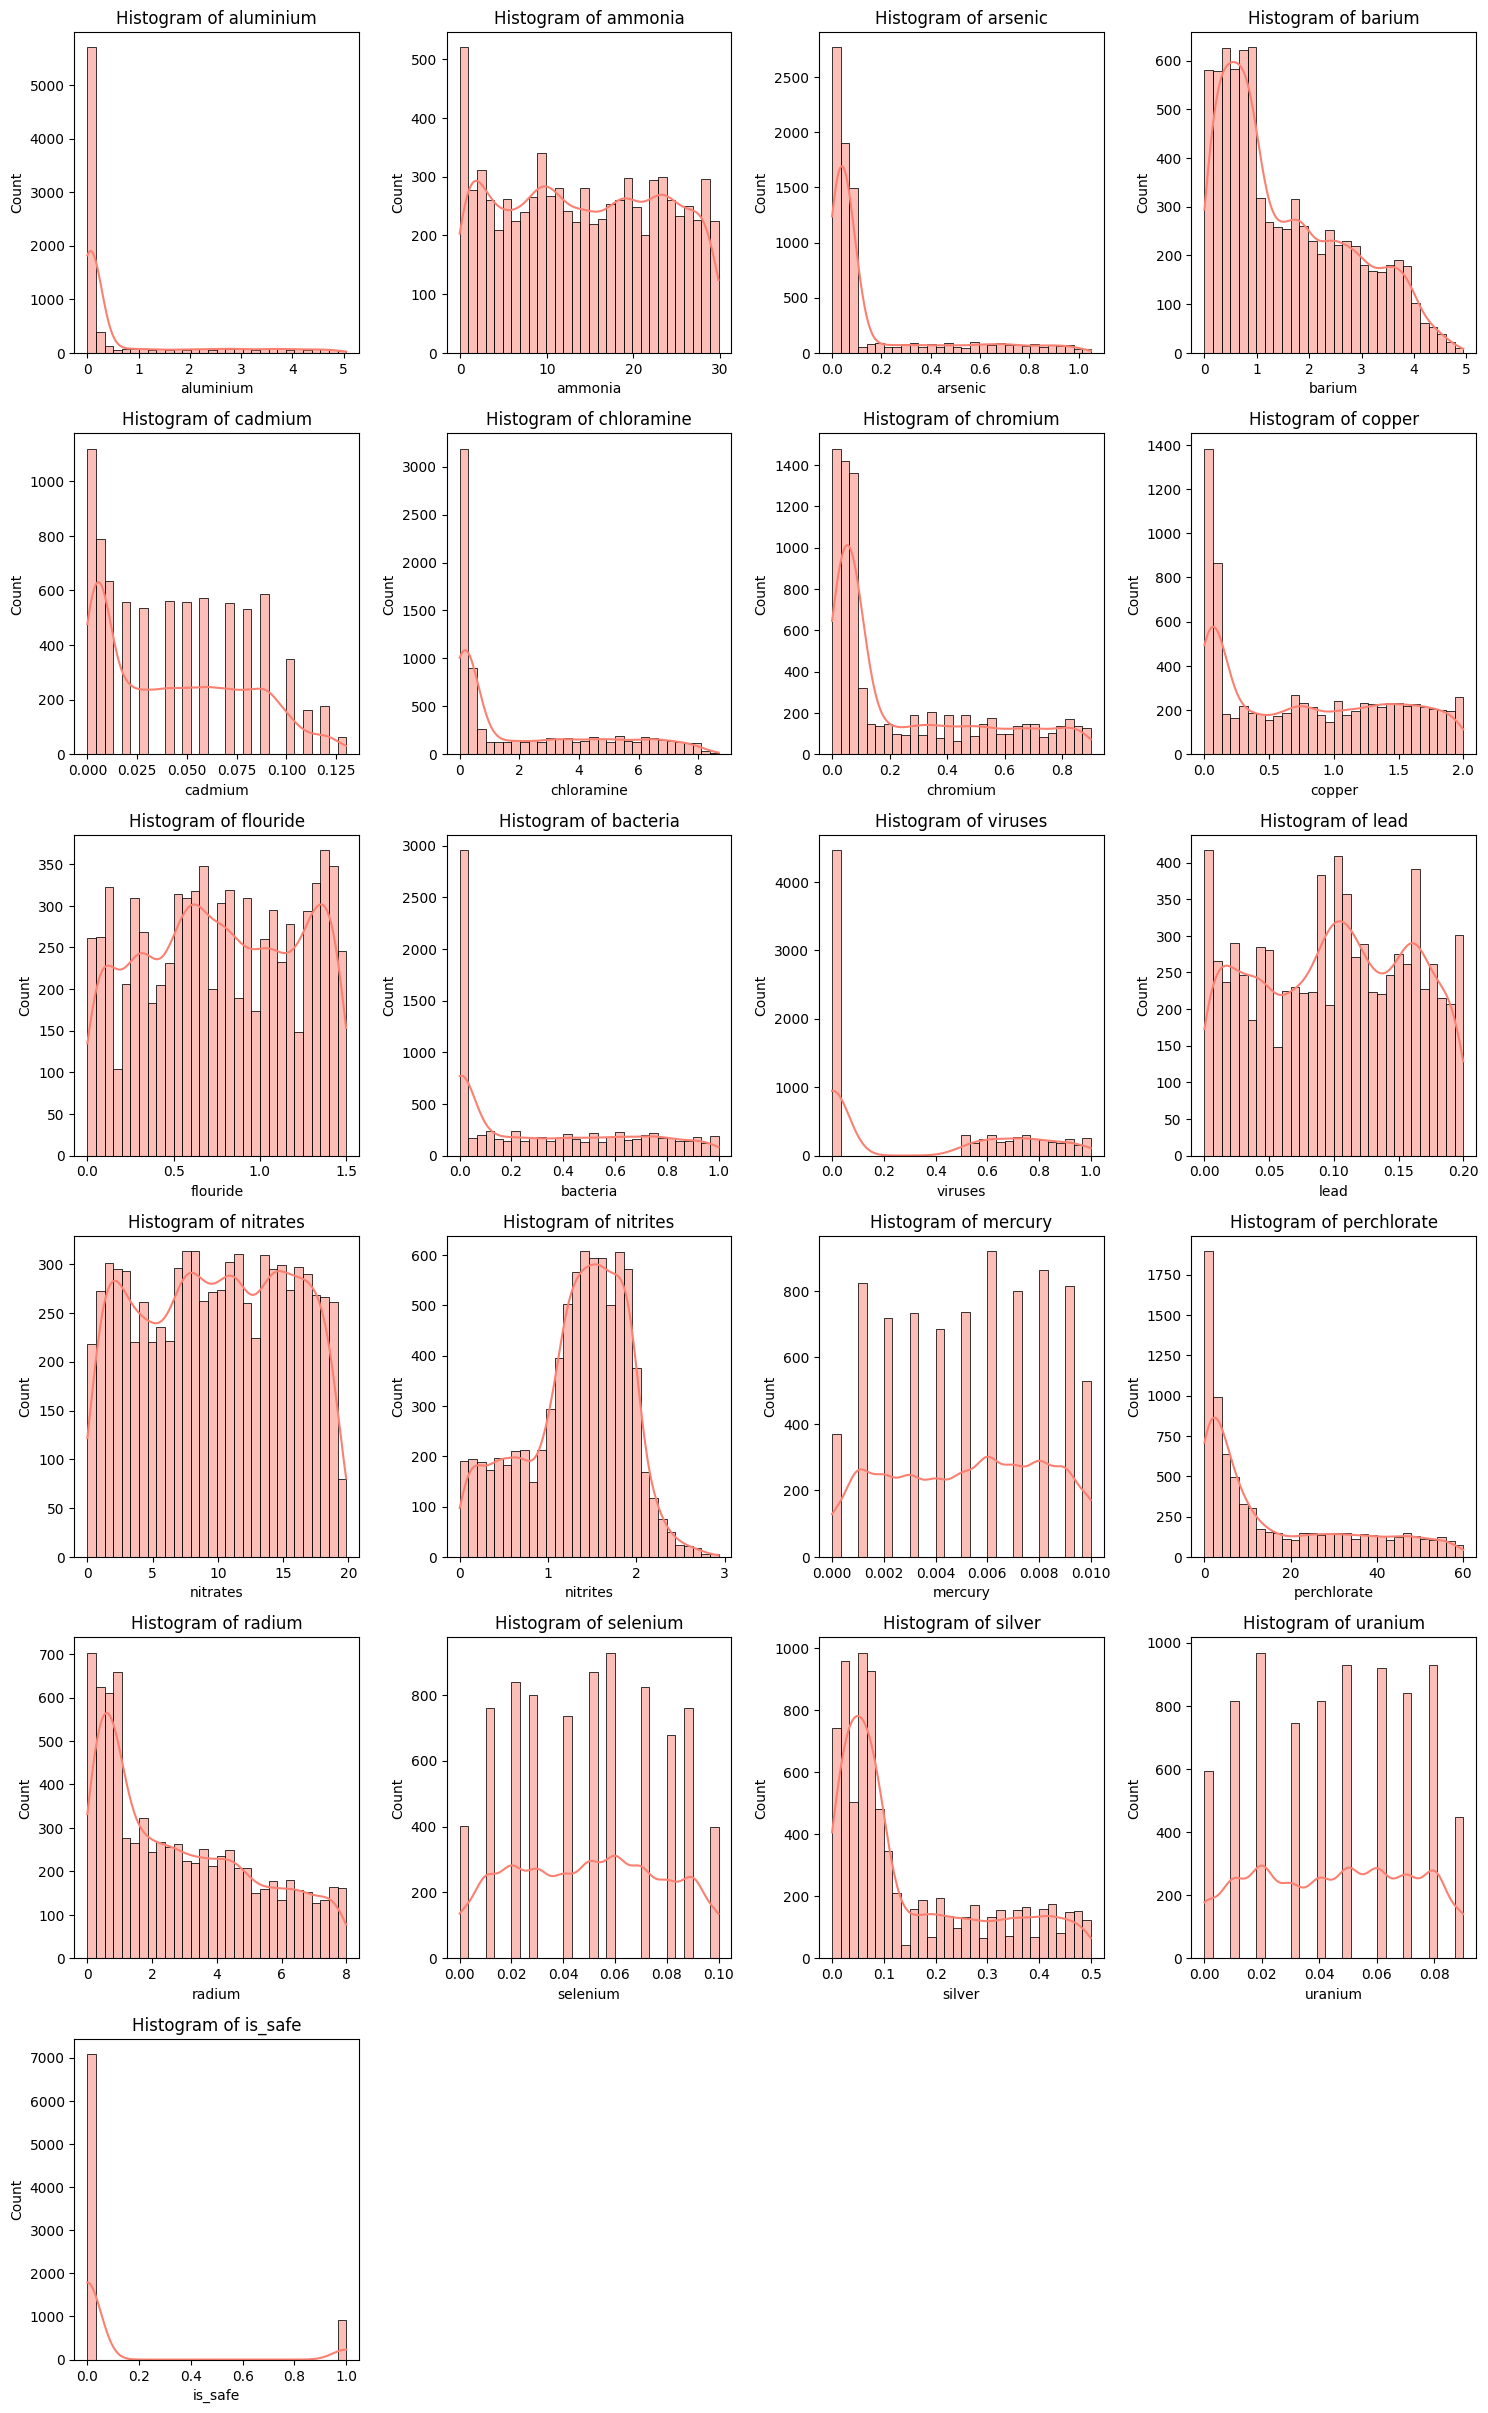

In [26]:
# Histogram for Feature Distribution
# Plot histograms for each numerical feature

plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 4, i)
    sns.histplot(df_data[col], kde=True, bins=30, color='salmon')
    plt.title(f'Histogram of {col}', fontsize=12)
plt.tight_layout()
plt.show()


In [27]:
# Check skewness of each numeric column
skewed_features = df_data.drop('is_safe', axis=1).skew().sort_values(ascending=False)
print(skewed_features)


aluminium      2.014072
arsenic        1.985851
silver         1.030034
chromium       1.028728
perchlorate    0.992035
chloramine     0.888680
barium         0.661337
bacteria       0.554535
radium         0.548553
cadmium        0.433857
viruses        0.425198
copper         0.253732
ammonia        0.026804
selenium       0.010362
uranium       -0.027111
flouride      -0.040506
nitrates      -0.041938
lead          -0.060862
mercury       -0.082363
nitrites      -0.498531
dtype: float64


In [28]:
skewed_cols = [
        'aluminium', 'arsenic', 'silver', 'chromium', 'perchlorate',
        'chloramine', 'barium', 'bacteria', 'radium'
    ]

In [29]:
# Cap outliers using IQR method
# Function to cap outliers using IQR method

def cap_outliers_iqr(df_data, columns):
    for col in columns:
        Q1 = df_data[col].quantile(0.25)
        Q3 = df_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Cap the values
        df_data[col] = np.where(df_data[col] < lower, lower, df_data[col])
        df_data[col] = np.where(df_data[col] > upper, upper, df_data[col])

    return df_data

# Apply to your dataframe
df_data_new = cap_outliers_iqr(df_data, skewed_cols)


In [30]:
df_data_new

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.64,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,0.64,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,0.64,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,0.64,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.64,24.33,0.03,0.20,0.006,2.67,0.69,0.57,NaN,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7751 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7935 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7732 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

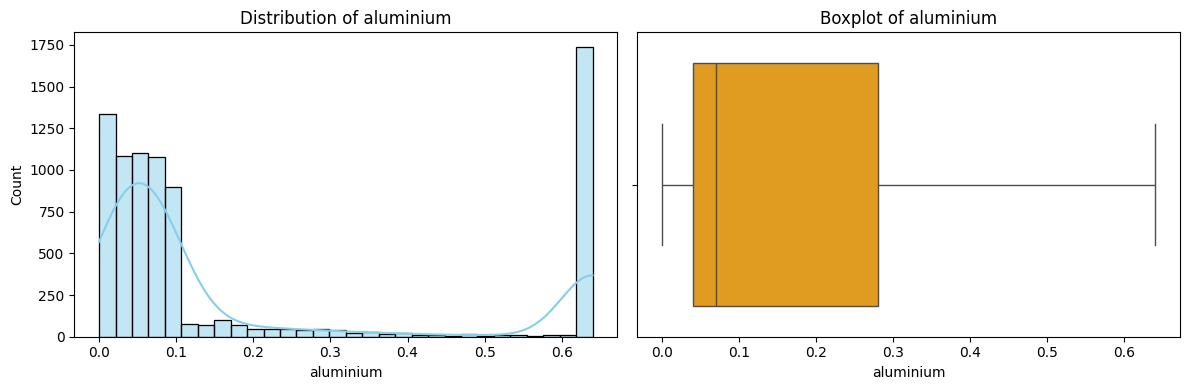

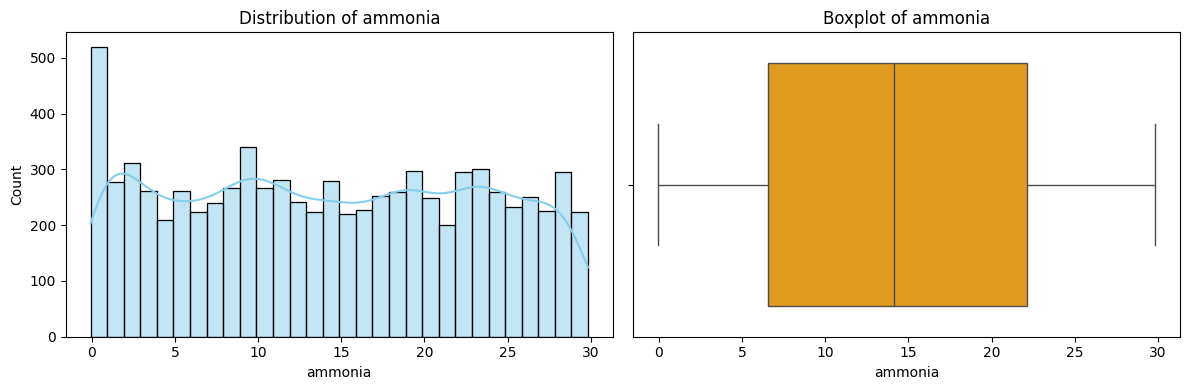

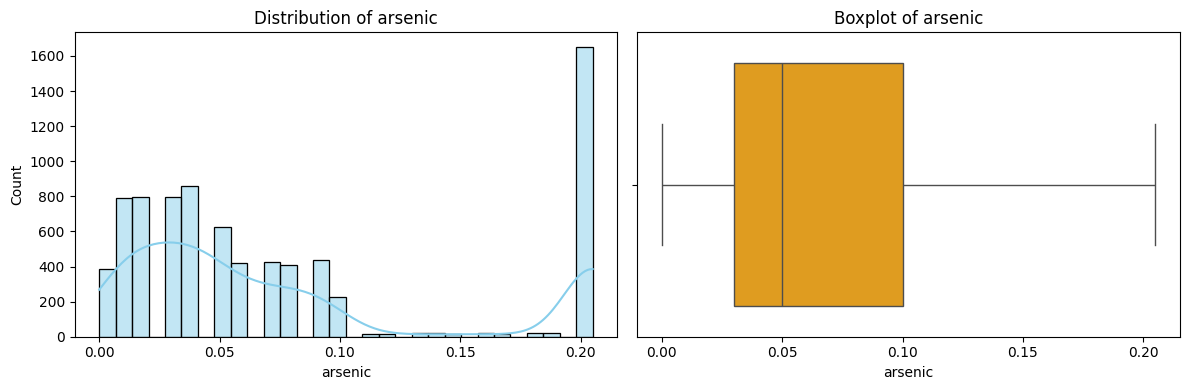

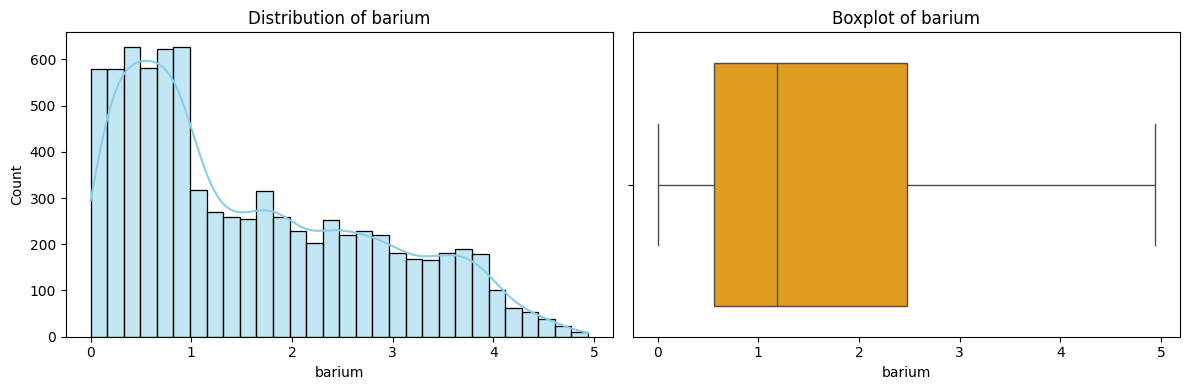

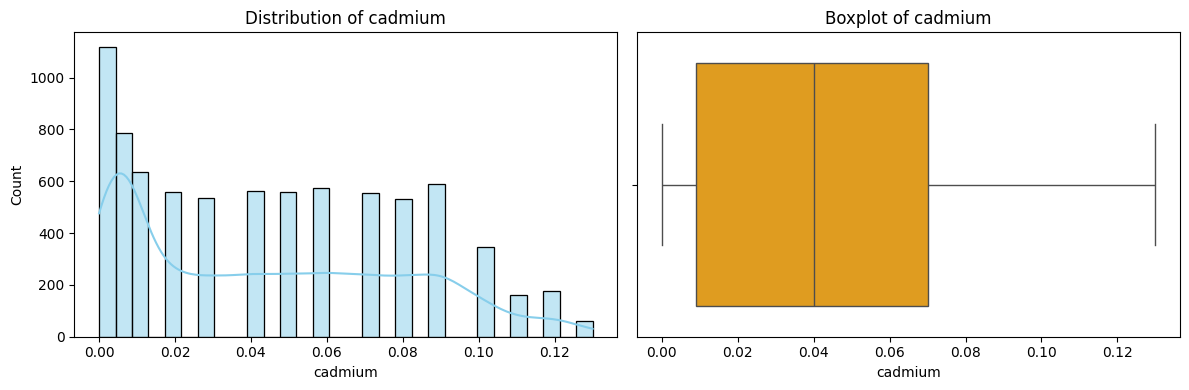

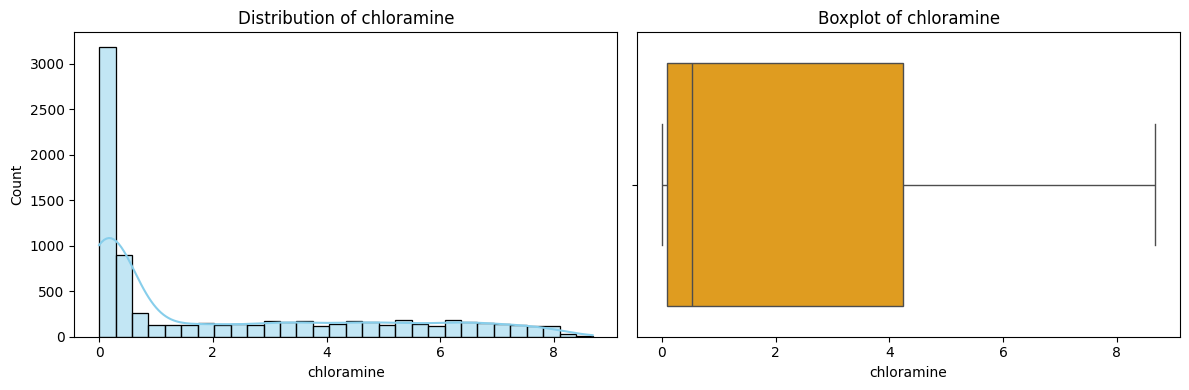

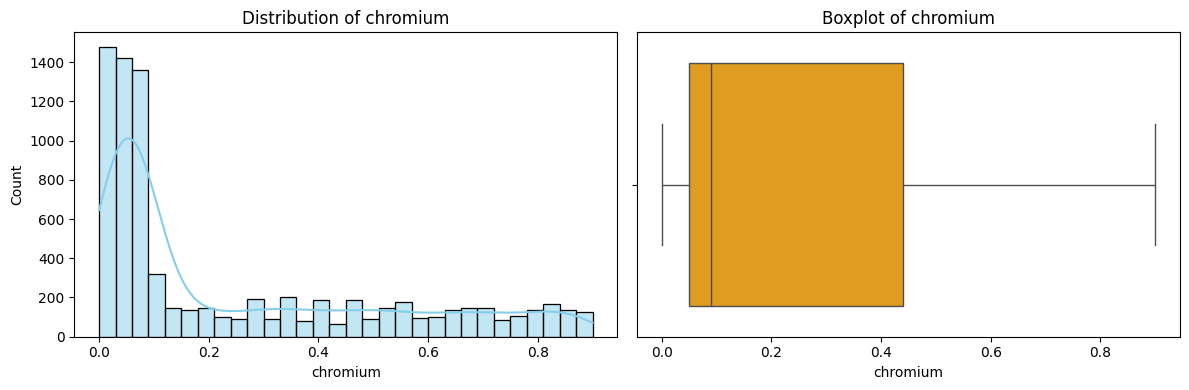

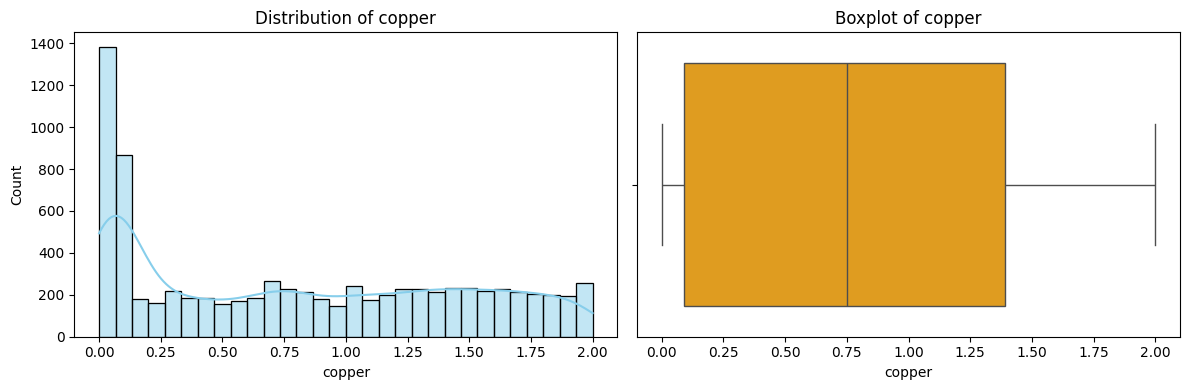

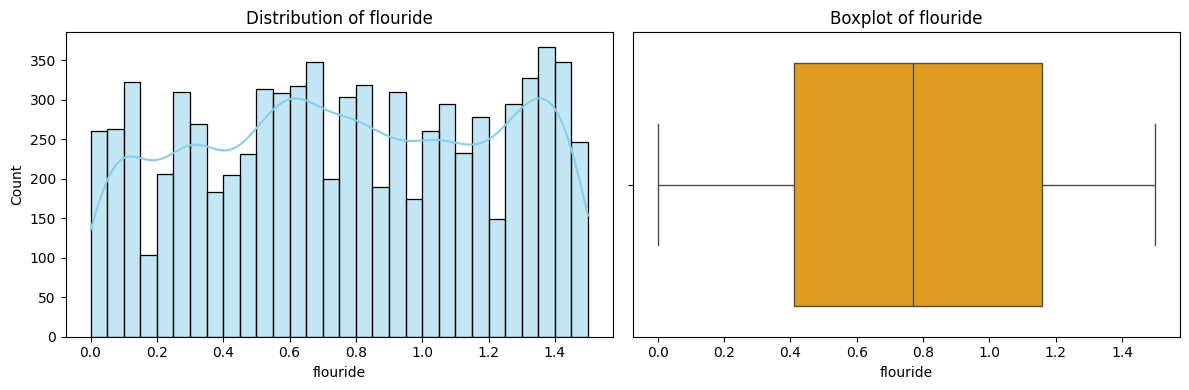

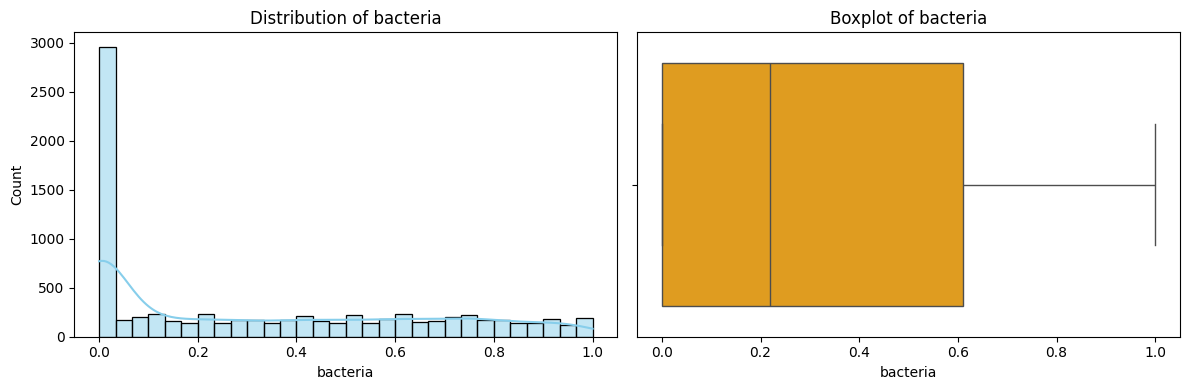

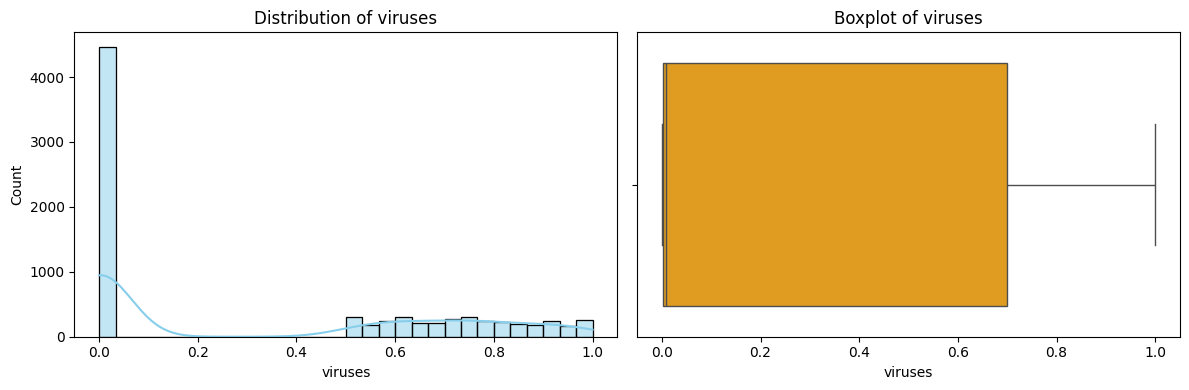

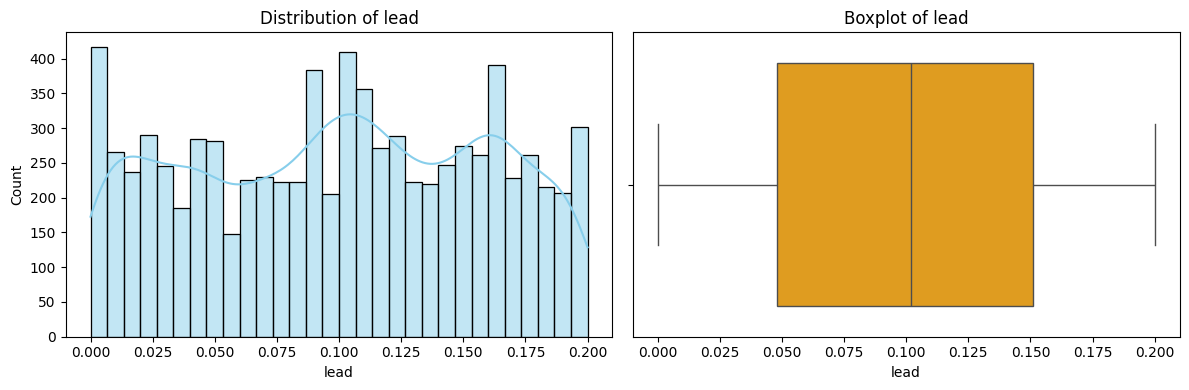

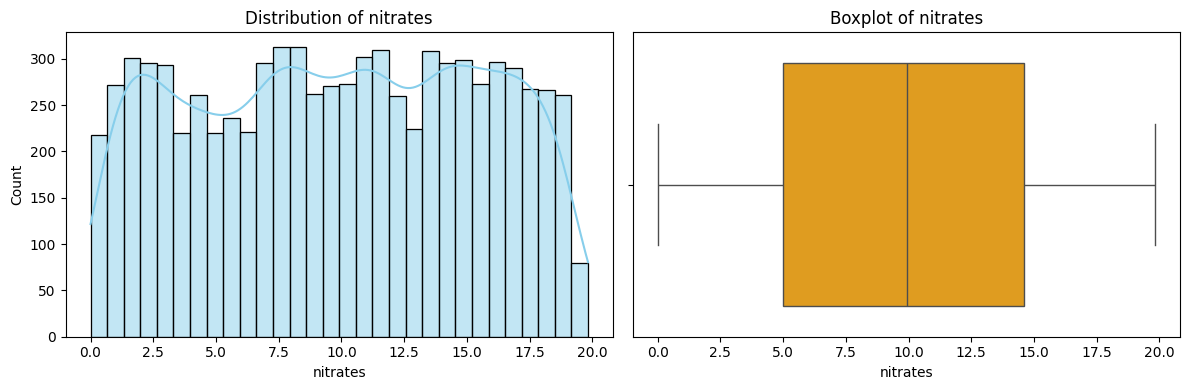

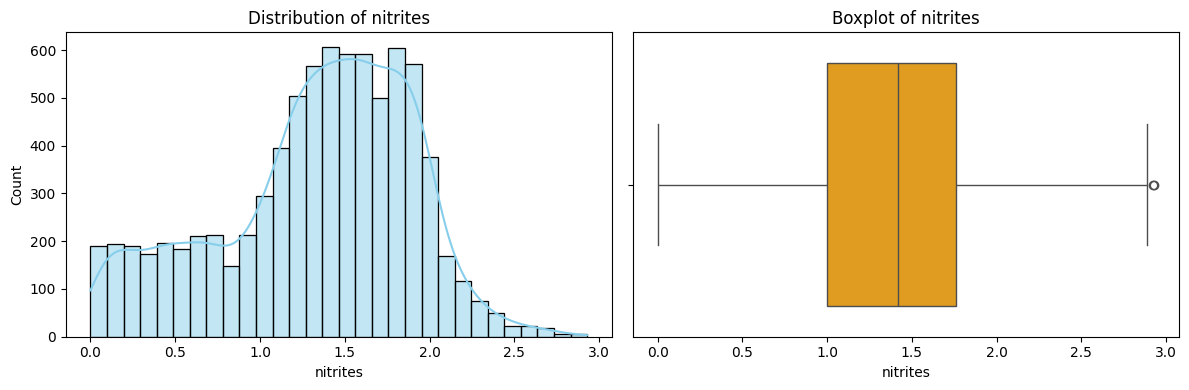

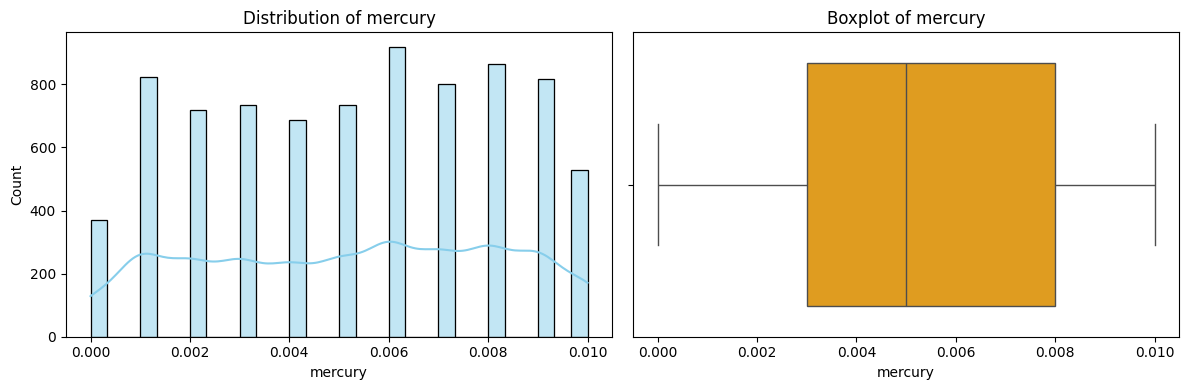

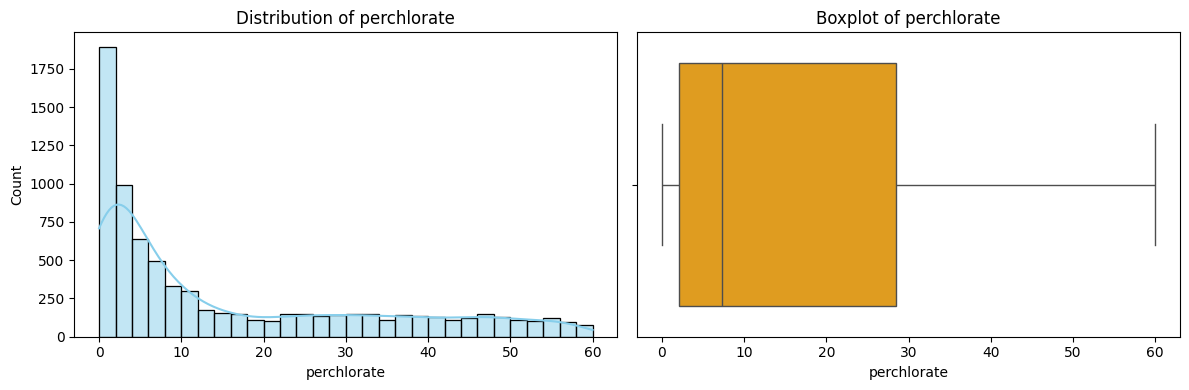

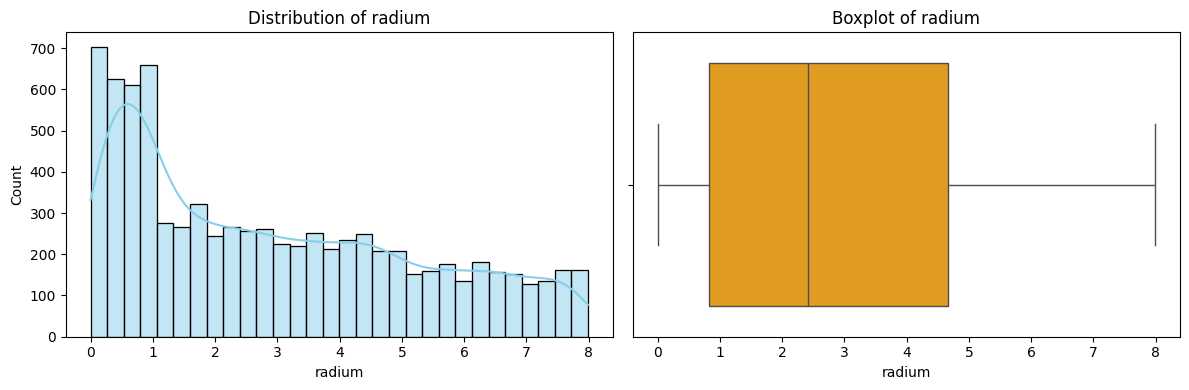

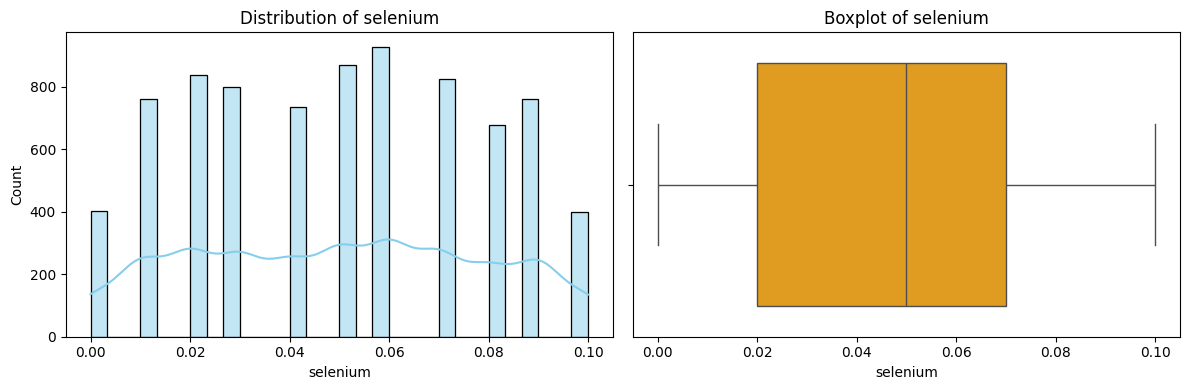

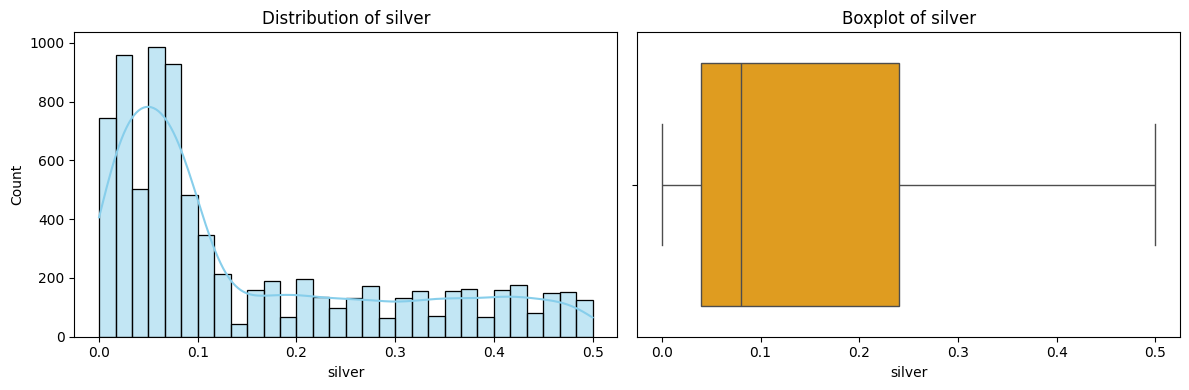

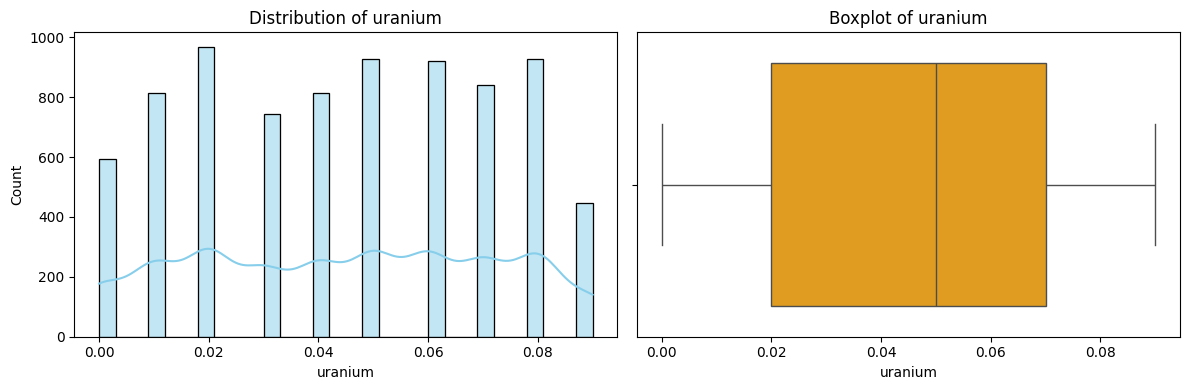

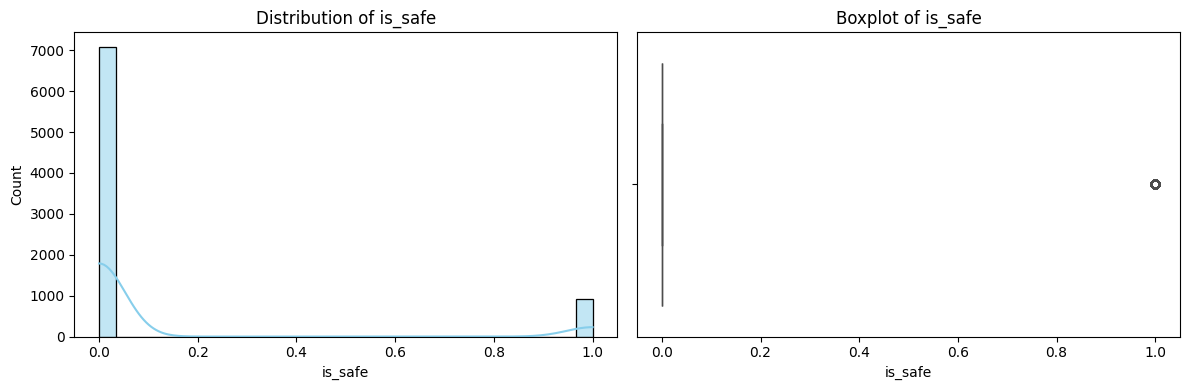

In [32]:
num_cols = df_data_new.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df_data_new[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_data_new[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

2.Bivariate Analysis:

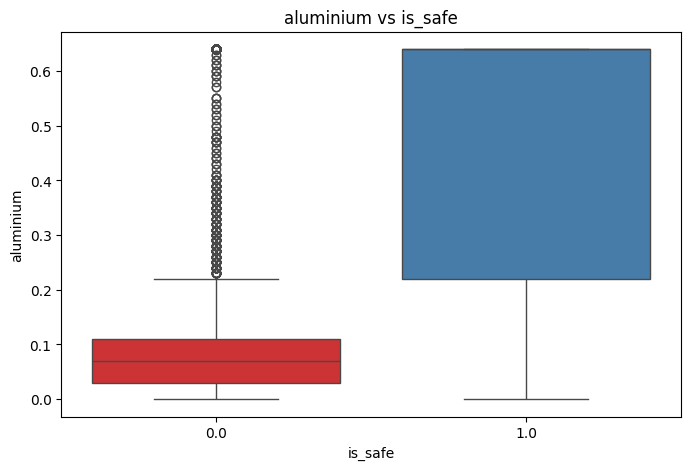

In [33]:
# Bivariate Analysis: Boxplots (Numerical Features vs Target)
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_safe', y='aluminium', data=df_data, palette='Set1')
plt.title('aluminium vs is_safe')
plt.show()


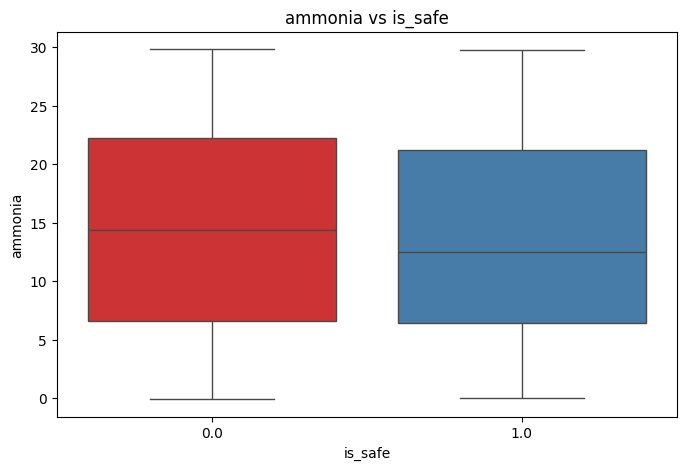

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_safe', y='ammonia', data=df_data, palette='Set1')
plt.title('ammonia vs is_safe')
plt.show()

In [35]:
df_data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

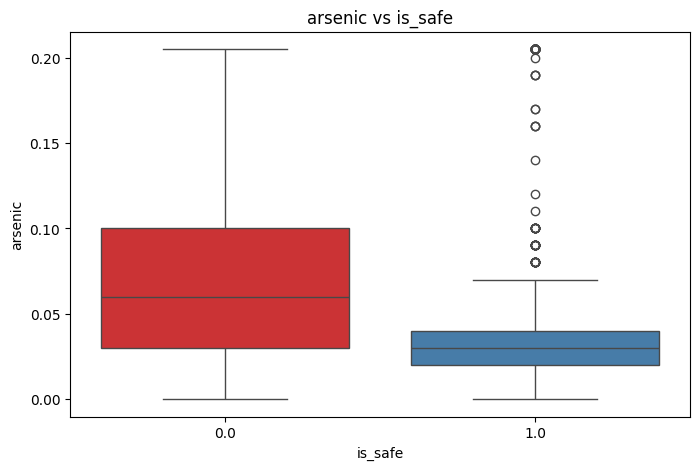

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_safe', y='arsenic', data=df_data, palette='Set1')
plt.title('arsenic vs is_safe')
plt.show()

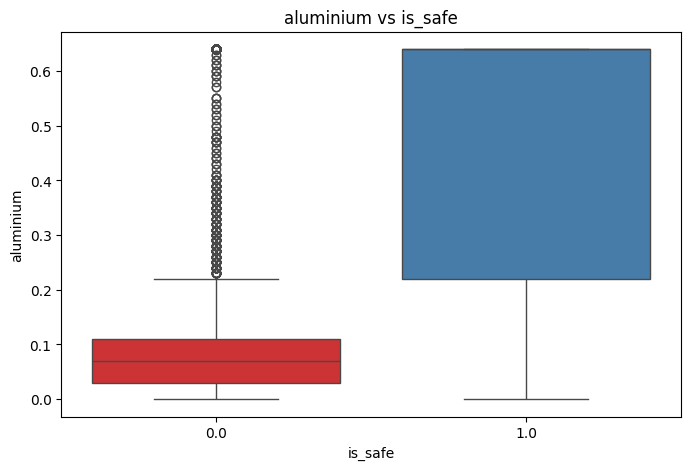

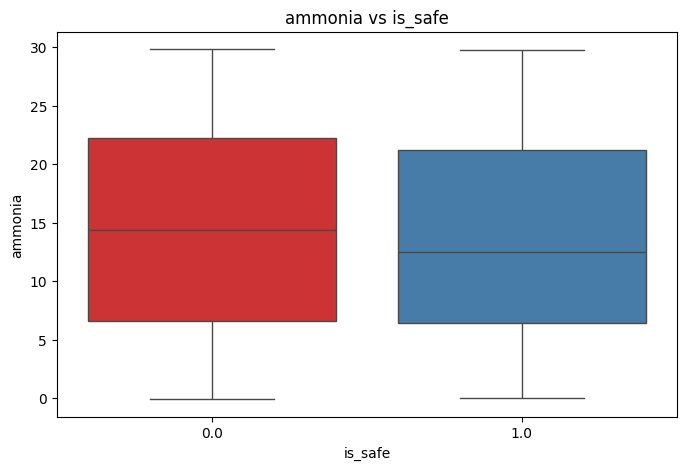

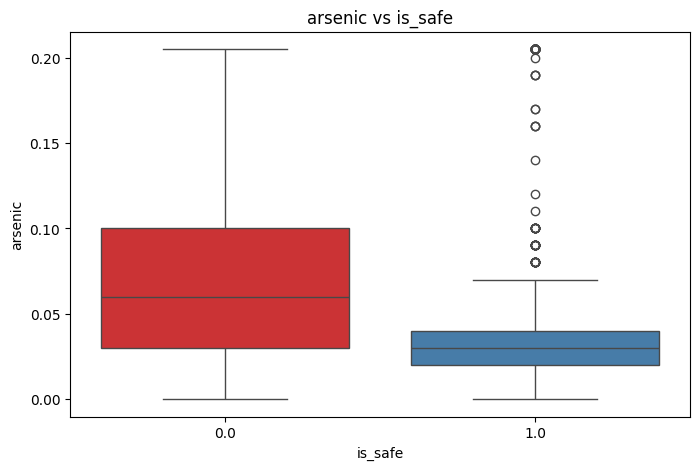

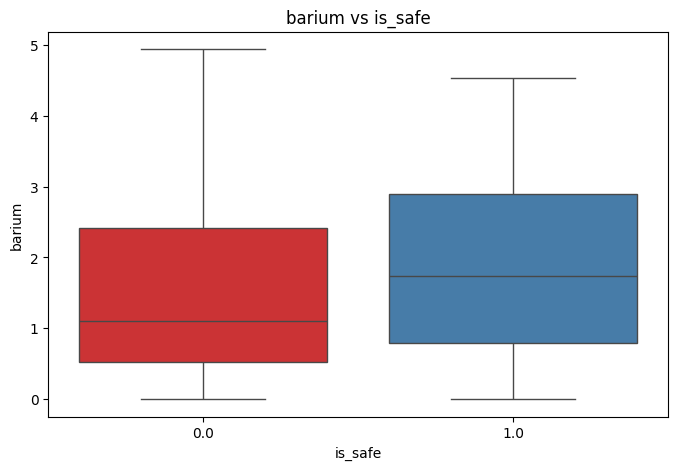

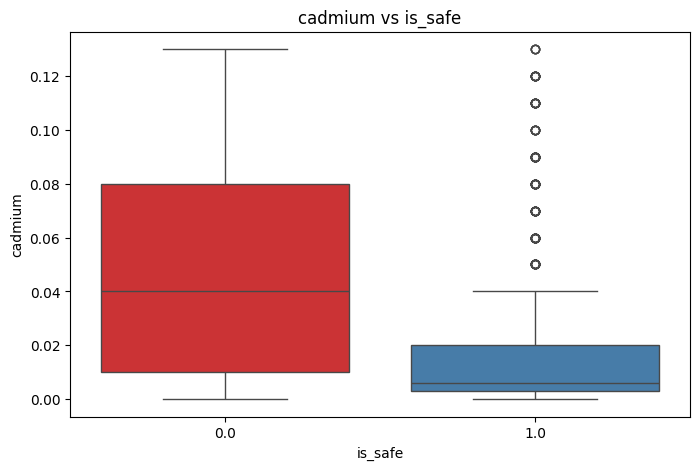

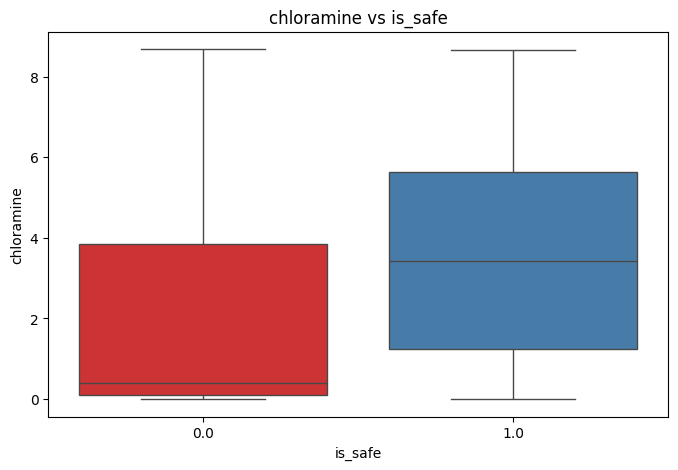

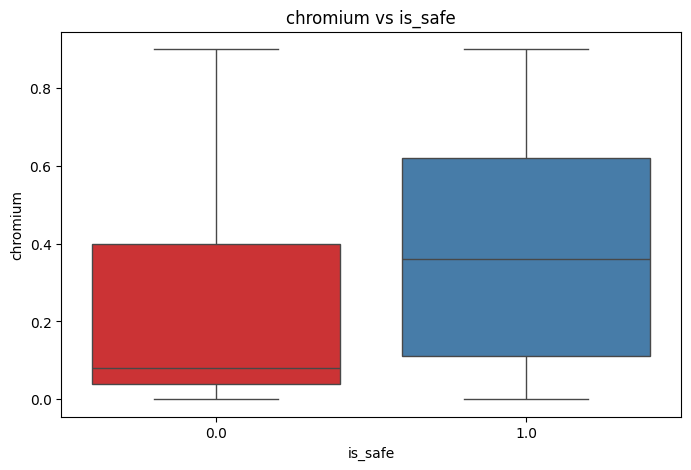

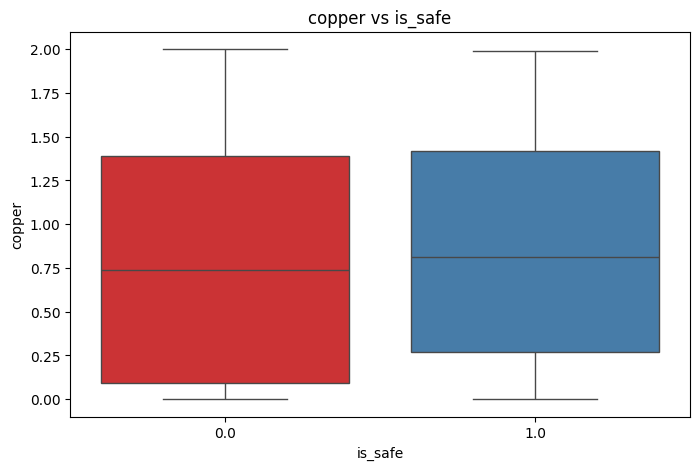

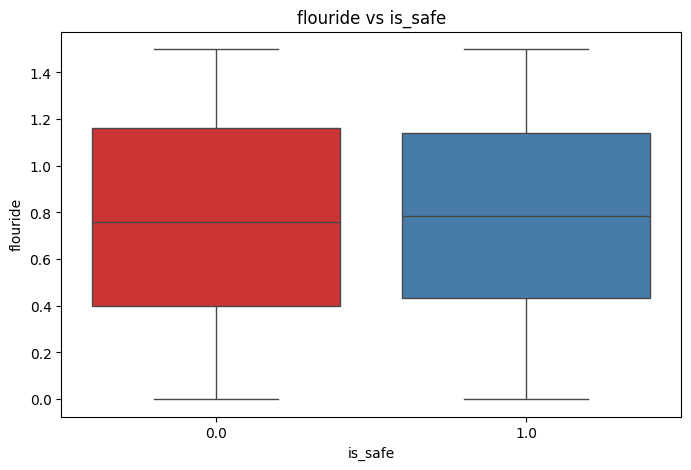

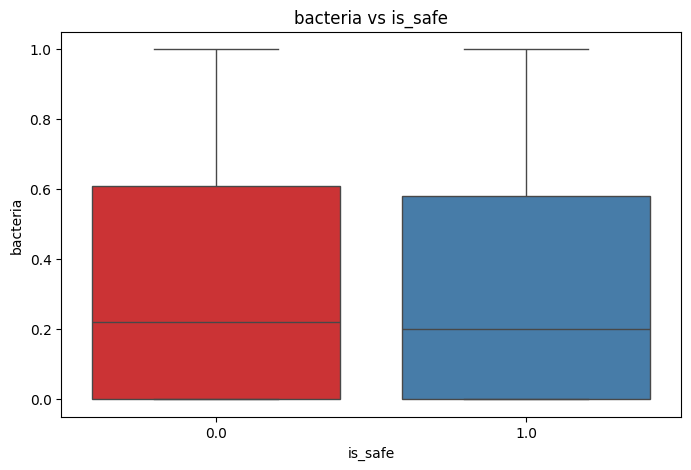

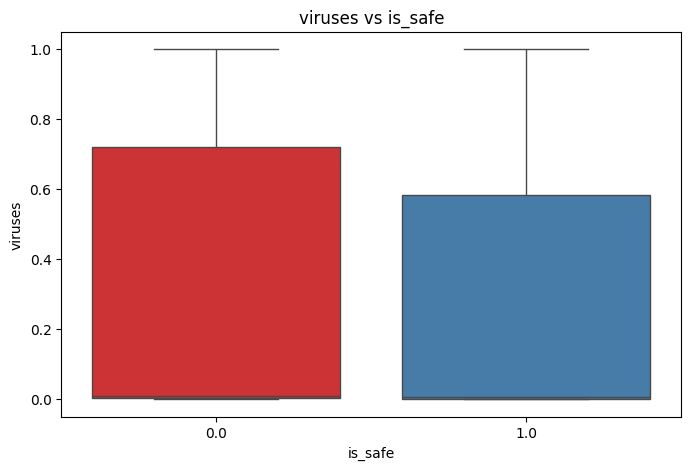

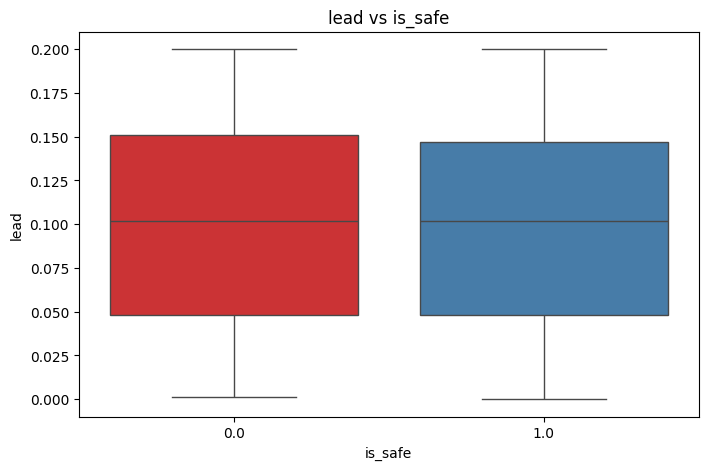

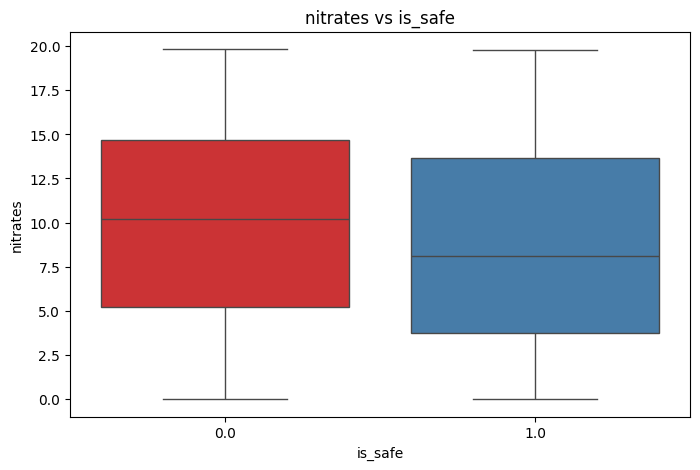

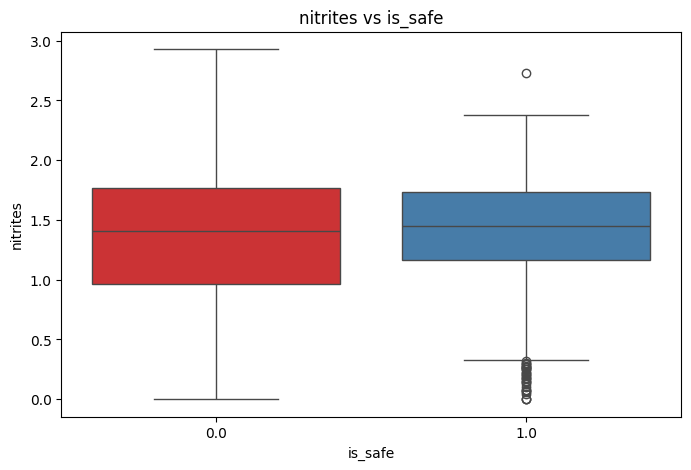

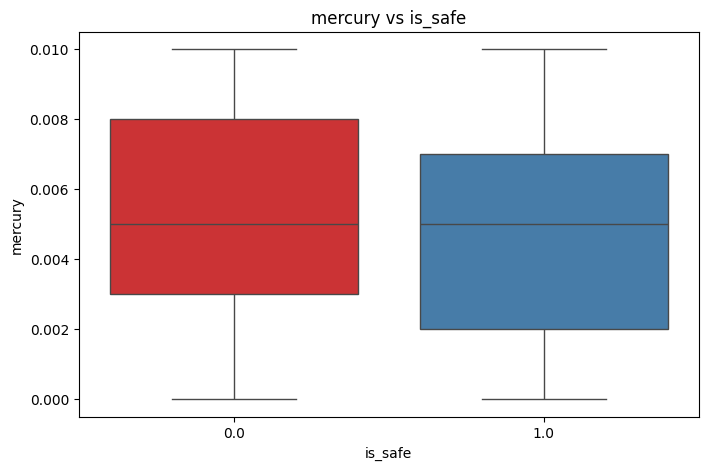

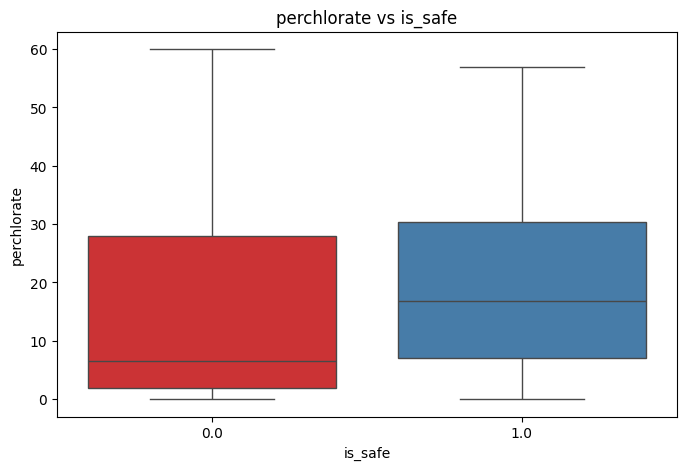

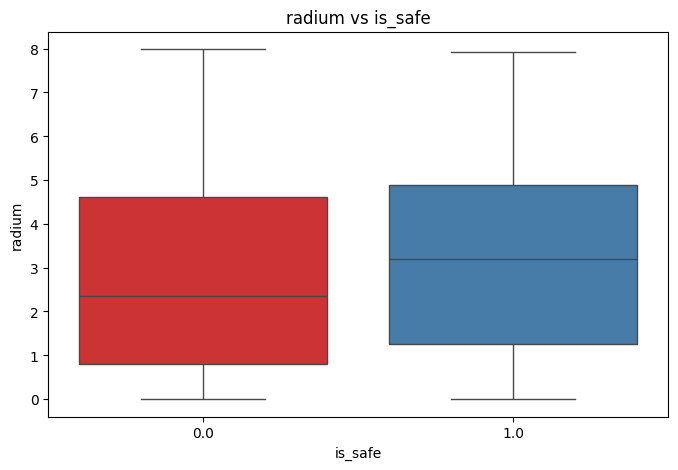

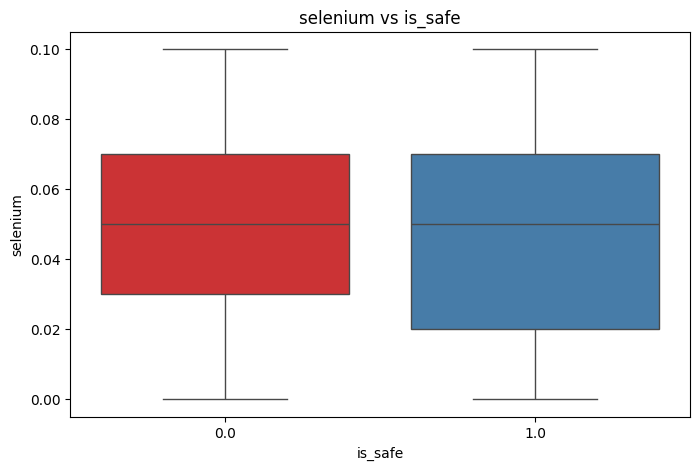

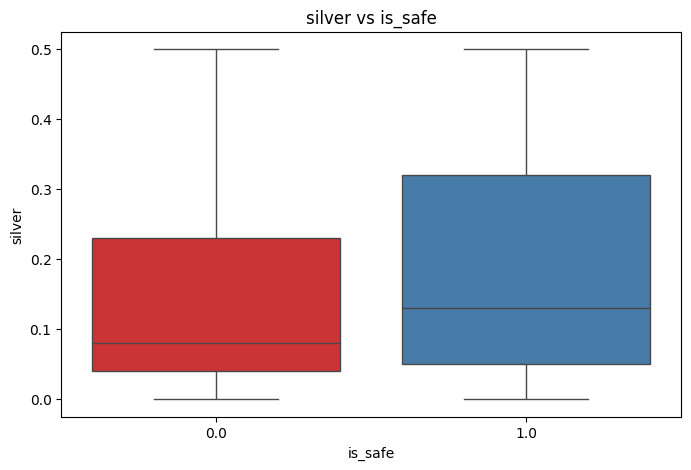

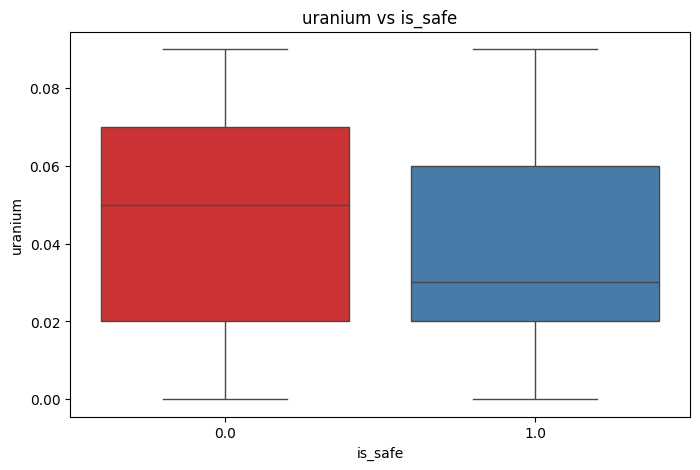

In [37]:
for col in df_data.columns:
    if col != 'is_safe':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='is_safe', y=col, data=df_data, palette='Set1')
        plt.title(f'{col} vs is_safe')
        plt.show()

NameError: name 'target' is not defined

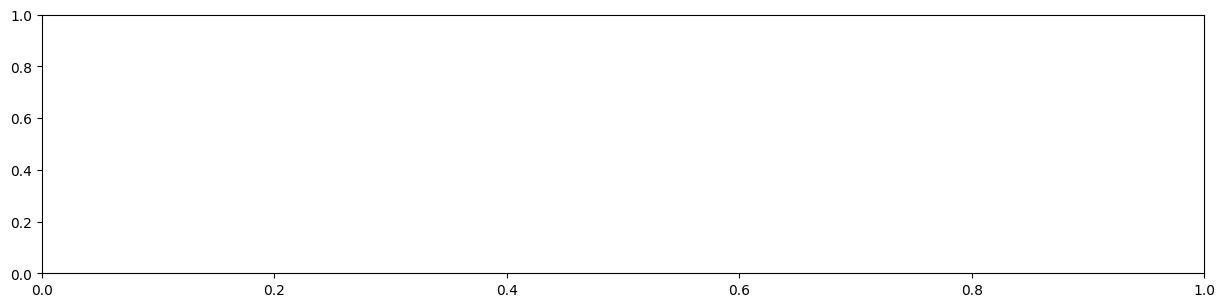

In [39]:
#
plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.violinplot(x=target, y=col, data=df_data, palette='muted')
    plt.title(f'{col} vs {target}', fontsize=12)
plt.tight_layout()
plt.show()


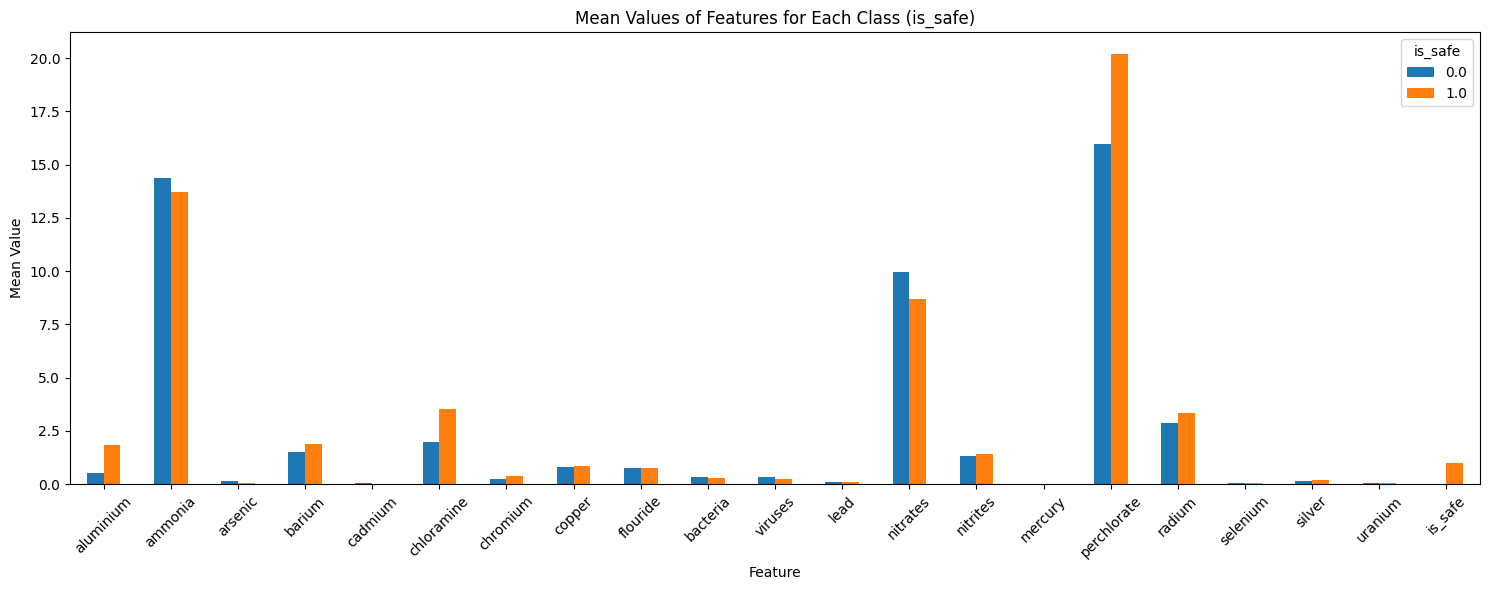

In [ ]:
grouped_stats = df_data.groupby('is_safe')[numerical_cols].mean().T
grouped_stats.plot(kind='bar', figsize=(15, 6))
plt.title('Mean Values of Features for Each Class (is_safe)')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

3. Multivariate analysis

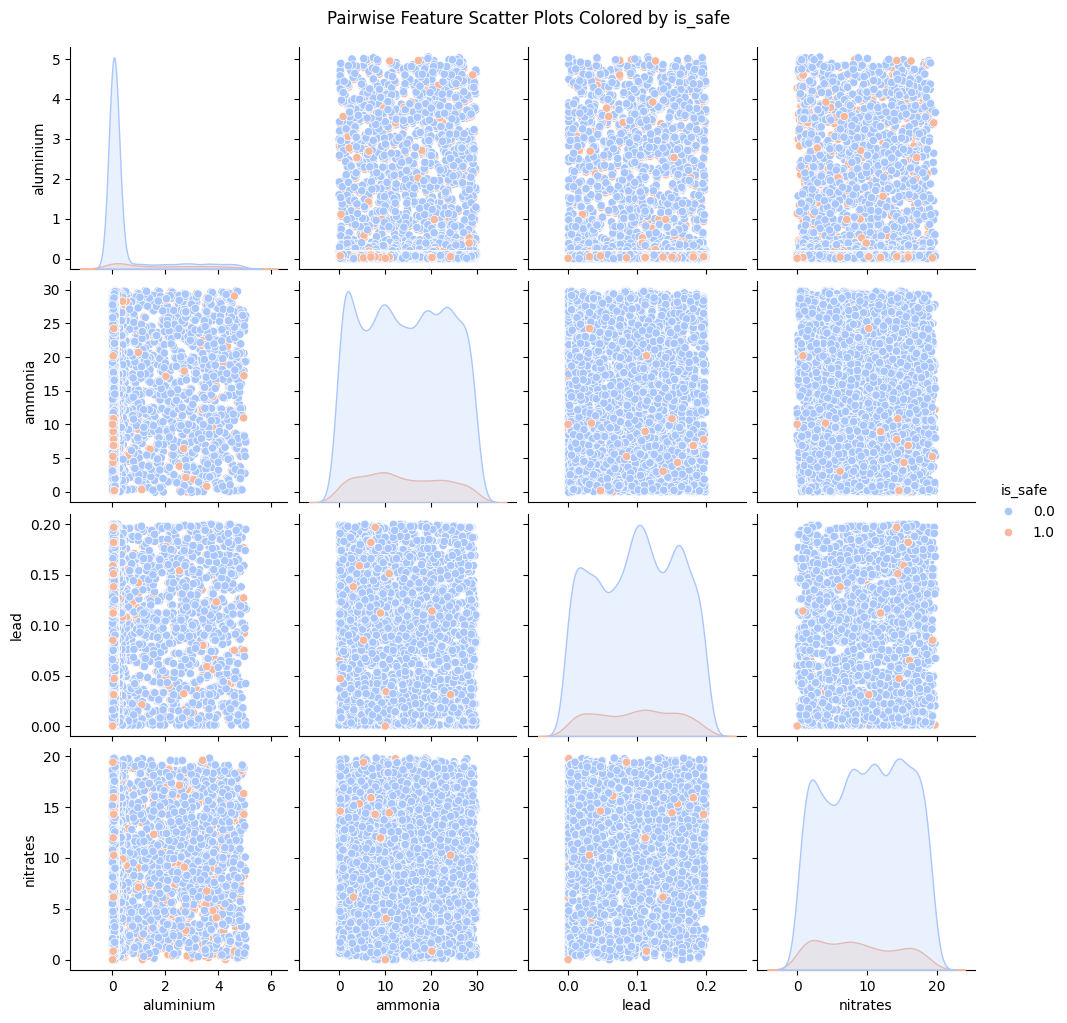

In [ ]:

sample_cols = ['aluminium', 'ammonia', 'lead', 'nitrates']  # removed 'is_safe' from here

# Pairplot of selected features + is_safe
sns.pairplot(df_data[sample_cols + ['is_safe']], hue='is_safe', palette='coolwarm')
plt.suptitle("Pairwise Feature Scatter Plots Colored by is_safe", y=1.02)
plt.show()



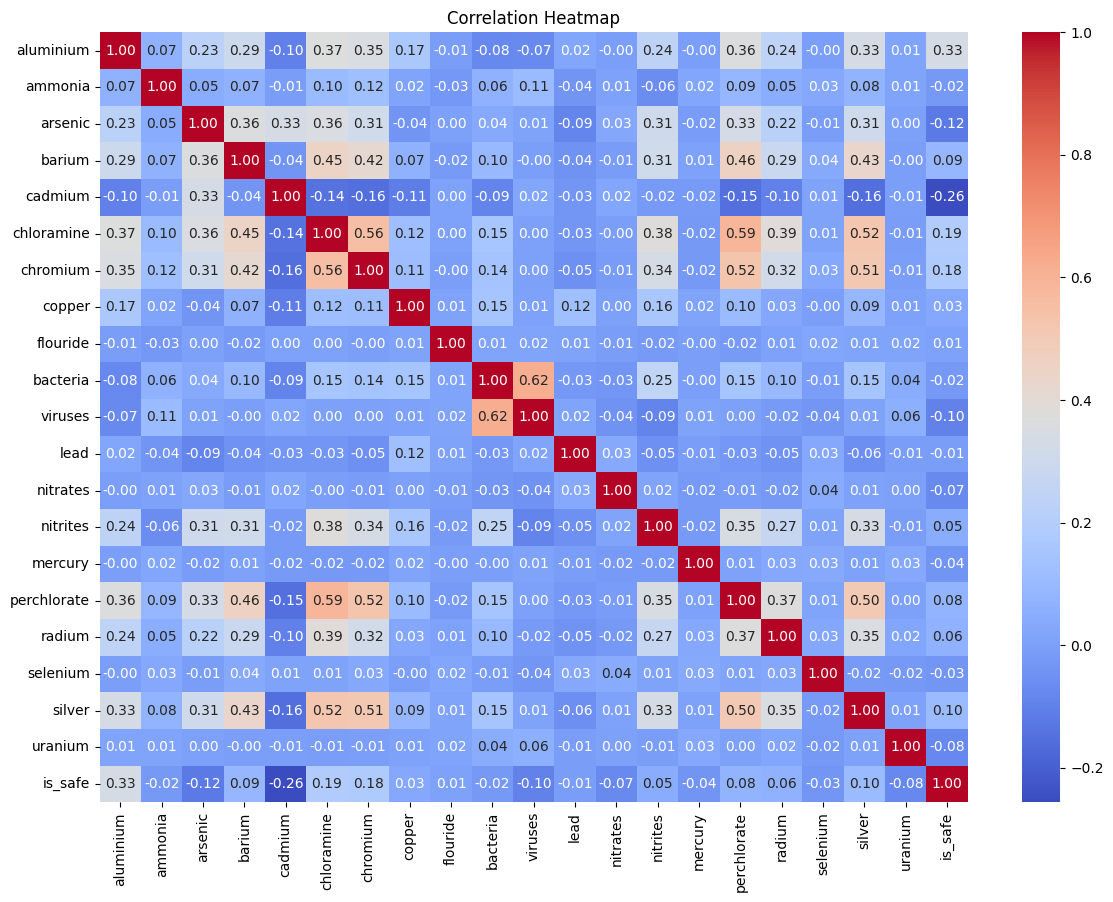

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Class Imbalance Handling & Train-Test Split

In [40]:
df_data_new['is_safe'].value_counts()

is_safe
0.0    7084
1.0     912
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [44]:
# Drop rows with NaN in the target
df_data = df_data[df_data_new['is_safe'].notna()]

In [ ]:
#pip install imbalanced-learn


In [46]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split original data (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# (Optional) Check class distribution after SMOTE
from collections import Counter
print("After SMOTE:", Counter(y_train_resampled))


NameError: name 'X' is not defined

# Model Building & Model Saving

In [47]:
# Logistic Regression
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression")
print("Train Score:", log_model.score(X_train_resampled, y_train_resampled))
print("Test Score :", log_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_log))
print("-" * 50)

NameError: name 'X_train_resampled' is not defined

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)

print("🔹 Decision Tree")
print("Train Score:", dt_model.score(X_train_resampled, y_train_resampled))
print("Test Score :", dt_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_dt))
print("-" * 50)

🔹 Decision Tree
Train Score: 1.0
Test Score : 0.945625
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1418
         1.0       0.73      0.83      0.78       182

    accuracy                           0.95      1600
   macro avg       0.85      0.90      0.87      1600
weighted avg       0.95      0.95      0.95      1600

--------------------------------------------------


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest")
print("Train Score:", rf_model.score(X_train_resampled, y_train_resampled))
print("Test Score :", rf_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest
Train Score: 1.0
Test Score : 0.945
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1418
         1.0       0.76      0.75      0.76       182

    accuracy                           0.94      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.94      0.94      0.94      1600



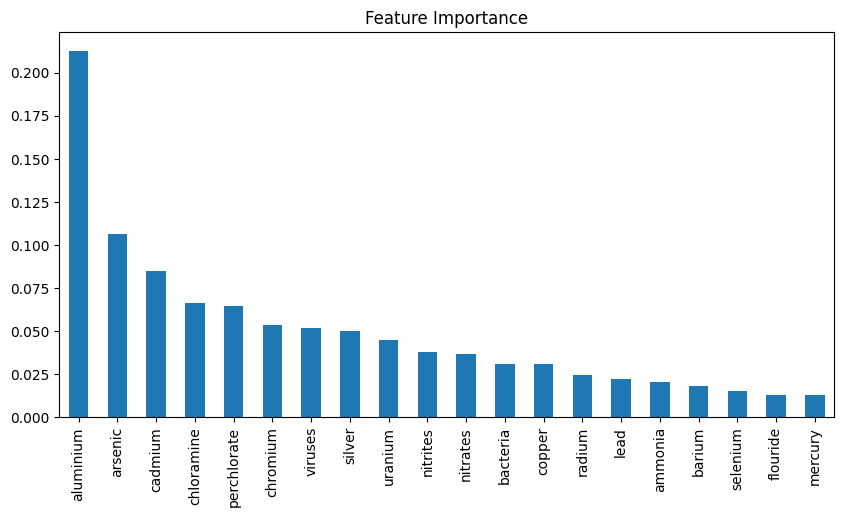

In [ ]:
# Feature Importance (for tree-based models)
# For Random Forest
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importance')
plt.show()


In [ ]:
# Save the Best Model
import joblib
joblib.dump(rf_model, "best_water_quality_model.pkl")


['best_water_quality_model.pkl']

In [ ]:
import joblib

# Load the model
model = joblib.load("best_water_quality_model.pkl")
# Make predictions
# Example: Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1418
         1.0       0.76      0.75      0.76       182

    accuracy                           0.94      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.94      0.94      0.94      1600



In [ ]:
df_data_new.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')